In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from collections import Counter
from sklearn import model_selection,svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,\
                precision_recall_curve,roc_curve,roc_auc_score
from imblearn.metrics import geometric_mean_score
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Data load
def data_load(file):
    data = pd.read_csv(file)
    x = data.iloc[:,0:-1].values
    y = data.iloc[:,-1].values
    print(x.shape, y.shape)
    print(data.head())
   
    print(Counter(y))
    return x, y

In [3]:
# Data preprocess
def data_preprocess(x, y):
   
    np.random.seed(112)
    np.random.shuffle(x)
    np.random.seed(112)
    np.random.shuffle(y)
    tf.random.set_seed(112)
   
    x_train, pre_x_test, y_train, pre_y_test = model_selection.train_test_split(
     x, y, test_size=0.4,random_state=0)
    x_vali, x_test, y_vali, y_test = model_selection.train_test_split(pre_x_test, pre_y_test, test_size=0.5, random_state=0)
    print(x_train.shape, x_vali.shape, x_test.shape, y_train.shape, y_vali.shape, y_test.shape)  
    return x_train, y_train, x_vali, y_vali, x_test, y_test

In [12]:
def metrics_all(x_test, y_test):
    y_pred= model_1.predict_classes(x_test)
    # accuracy 
    val_acc = history.history['val_sparse_categorical_accuracy']
    print('accuracy = {}\n'.format(val_acc[-1]))
    #  auc 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print('auc面积 = {0}\n'.format(auc))

    # F1-score 
    f1_micro = f1_score(y_test,y_pred,average='micro')
    f1_macro = f1_score(y_test,y_pred,average='macro') 
    print('f1_score_minority = {0}\n'.format(f1_micro))
    print('f1_score_majority = {0}\n'.format(f1_micro))

    # precision, recall 
    con_matrix=confusion_matrix(y_test,y_pred)
    P=precision_score(y_test,y_pred,average='binary')
    R=recall_score(y_test,y_pred,average='binary')
    F1=f1_score(y_test,y_pred,average='binary')
    precision,recall,_=precision_recall_curve(y_test,y_pred)
    fpr,tpr,_=roc_curve(y_test,y_pred)
    print('precison = {}\n'.format(P))
    print('recall_score = {}\n'.format(R))

    # G-mean 
    G_mean=geometric_mean_score(y_test, y_pred)
    print('G-mean = {}\n'.format(G_mean))

    # imbalance report
    
    
    target_names = ['class 0', 'class 1'] # doctest : +NORMALIZE_WHITESPACE
    print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))

    # ROC 
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Accuracy and Loss 
    acc = history.history['sparse_categorical_accuracy'] 
    val_acc = history.history['val_sparse_categorical_accuracy'] 
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.subplot(1,2,1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

In [10]:
x, y = data_load('creditcard.csv')
x_train, y_train, x_vali, y_vali, x_test, y_test = data_preprocess(x, y)

(284807, 30) (284807,)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V

In [11]:
# 2.1 MLP model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),   
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  
])
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])
history = model_1.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_vali,y_vali), validation_freq=1)
model_1.summary()

Epoch 1/10
5341/5341 [==============================] - 11s 2ms/step - loss: 24.4670 - sparse_categorical_accuracy: 0.9964 - val_loss: 3.3682 - val_sparse_categorical_accuracy: 0.9975
Epoch 2/10
5341/5341 [==============================] - 11s 2ms/step - loss: 17.9133 - sparse_categorical_accuracy: 0.9960 - val_loss: 21.4929 - val_sparse_categorical_accuracy: 0.9980
Epoch 3/10
5341/5341 [==============================] - 10s 2ms/step - loss: 10.8471 - sparse_categorical_accuracy: 0.9963 - val_loss: 12.6302 - val_sparse_categorical_accuracy: 0.9979
Epoch 4/10
5341/5341 [==============================] - 11s 2ms/step - loss: 8.4774 - sparse_categorical_accuracy: 0.9962 - val_loss: 4.1902 - val_sparse_categorical_accuracy: 0.9978
Epoch 5/10
5341/5341 [==============================] - 11s 2ms/step - loss: 7.2356 - sparse_categorical_accuracy: 0.9963 - val_loss: 1.4411 - val_sparse_categorical_accuracy: 0.9977
Epoch 6/10
5341/5341 [==============================] - 11s 2ms/step - loss: 6.7

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
accuracy = 0.997524619102478

auc面积 = 0.8182960839510386

f1_score_minority = 0.9977002212000983

f1_score_majority = 0.9977002212000983

precison = 0.3821656050955414

recall_score = 0.6382978723404256

G-mean = 0.7982537972515922

                   pre       rec       spe        f1       geo       iba       sup

    class 0       1.00      1.00      0.64      1.00      0.80      0.66     56868
    class 1       0.38      0.64      1.00      0.48      0.80      0.61        94

avg / total       1.00      1.00      0.64      1.00      0.80      0.66     56962



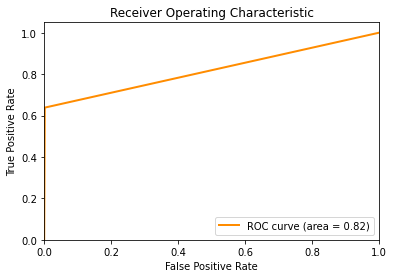

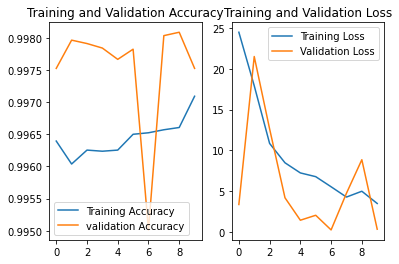

In [13]:
metrics_all(x_test, y_test)